# `Football Analytics`

### Import libraries

In [7]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import pandas as pd
import numpy as np
import requests

### Draw a pitch

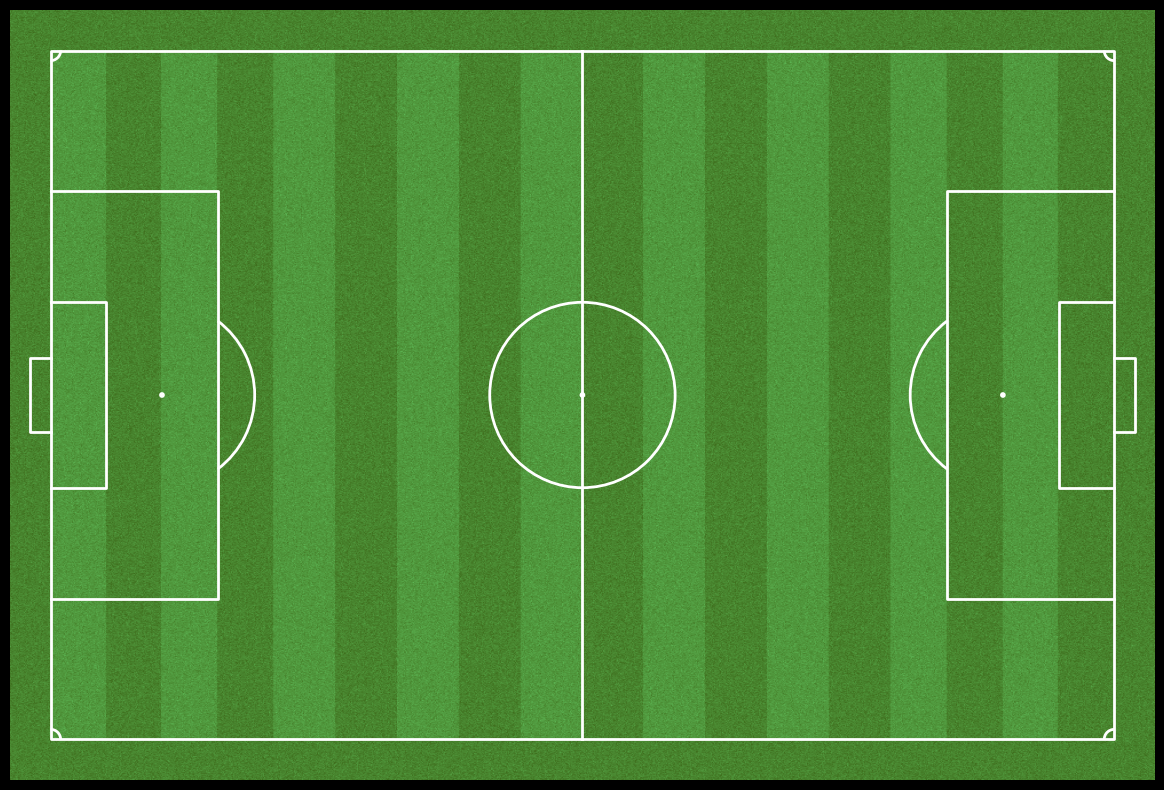

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')


pitch = Pitch(pitch_type='uefa', pitch_color='grass', line_color='white', goal_type='box', stripe=True, corner_arcs=True)
pitch.draw(ax=ax)

plt.show()

### Create a pass map